In [3]:
using Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Calculus ───────────────────────── v0.5.1
   Installed HypergeometricFunctions ────────── v0.3.11
   Installed SIMDDualNumbers ────────────────── v0.1.1
   Installed OffsetArrays ───────────────────── v1.12.7
   Installed TreeViews ──────────────────────── v0.3.0
   Installed StatsFuns ──────────────────────── v1.0.1
   Installed NonlinearSolve ─────────────────── v0.3.22
   Installed PDMats ─────────────────────────── v0.11.16
   Installed DifferentialEquations ──────────── v7.3.0
   Installed Sundials_jll ───────────────────── v5.2.1+0
   Installed Polyester ──────────────────────── v0.6.15
   Installed RecursiveArrayTools ────────────── v2.32.0
   Installed CEnum ──────────────────────────── v0.4.2
   Installed FunctionWrappers ───────────────── v1.1.2
   Installed StaticArrays ───────────────────── v1.5.6
   Installed TriangularSolve ────────────────── v0.1.13
   Installed Arra

In [2]:
using DifferentialEquations
using Plots

In [5]:
# Writing a parametrized function

function parametrized_lorenz!(du, u, p, t)

    x, y, z = u   #variables are part of vector array u 
    σ, ρ, β, = p  #coefficients are part of vector array

    du[1] = dx = σ*(y-x)
    du[2] = dy = x*(ρ-z) - y
    du[3] = dz = x*y - β*z

end

parametrized_lorenz! (generic function with 1 method)

In [6]:
#Initial Conditions: x=1.0, y=0.0, z=0.0
u0 = [1.0, 0.0, 0.0]

#Timespan of the simualation. 100 in this case
tspan = (0.0, 100.0)

#Coefficients of the function
p = [10.0, 28.0, 8/3]

#Feeding the inputs to the solver

prob = ODEProblem(parametrized_lorenz!, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1263-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624077544510573
   0.009058075635317072
   0.01695646895607931
   0.02768995855685593
   0.04185635042021763
   0.06024041165841079
   0.08368541255159562
   0.11336499649094857
   0.1486218182609657
   0.18703978481550704
   ⋮
  99.05535949898116
  99.14118781914485
  99.22588252940076
  99.30760258626904
  99.39665422328268
  99.49536147459878
  99.58822928767293
  99.68983993598462
  99.77864535713971
  99.85744078539504
  99.93773320913628
 100.0
u: 1263-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.001046162

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


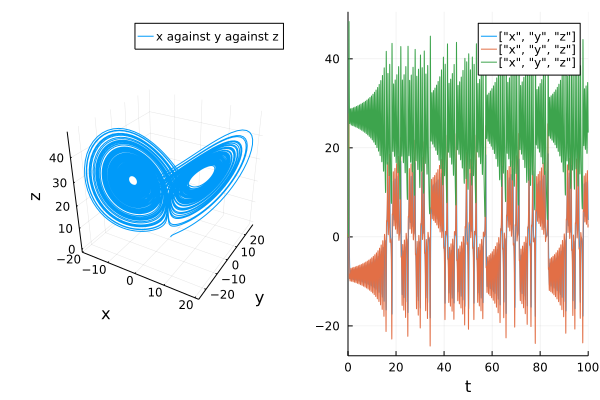

In [7]:
plot1 = plot(sol, 
            vars = (1,2,3),
            xlabel="x",
            ylabel="y",
            zlabel="z",
            label="x against y against z")

plot2 = plot(sol, label = ["x", "y", "z"])

plot(plot1, plot2, layout=(1, 2))

LoadError: syntax: "\" is not a unary operator